In [214]:
# imports
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import scipy.stats as stats
import statistics as s

# for chart image
from IPython.display import Image

# import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


#sse
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score


# sql ace credentials
import env
import wrangle as wr
import seaborn as sns
import explore as ex


# load zillow data

In [230]:
df = wr.wrangle_zillow()

In [231]:
df.head(1)

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
0,4,2.0,3633,296425,2005,6941.39,6037


In [232]:
train, val, test = wr.split_data(df)

(1172920, 7) (502681, 7) (418901, 7)


# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [233]:
train = train.drop(columns= ['bedrooms','bathrooms','year_built','tax_amount','fips'])

In [234]:
mms = MinMaxScaler()

In [235]:
train['sq_feet']= mms.fit_transform(train[['sq_feet']])

In [237]:
#split into my X_train and y_train
x_train = train[['sq_feet']]
y_train = train.tax_value

x_validate = val[['sq_feet']]
y_validate = val.tax_value

x_test = test[['sq_feet']]
y_test = test.tax_value

In [239]:
x_train.head(5)

,sq_feet
1794917,0.181509
1989455,0.256854
312790,0.128530
694637,0.282004
1704331,0.115646


In [246]:
# create model
model = LinearRegression().fit(x_train,y_train)
train['yhat'] = model.predict(x_train)

# plot the residuals for the linear regression model that you made.

In [249]:
train['residuals'] = train['tax_value'] - train['yhat']

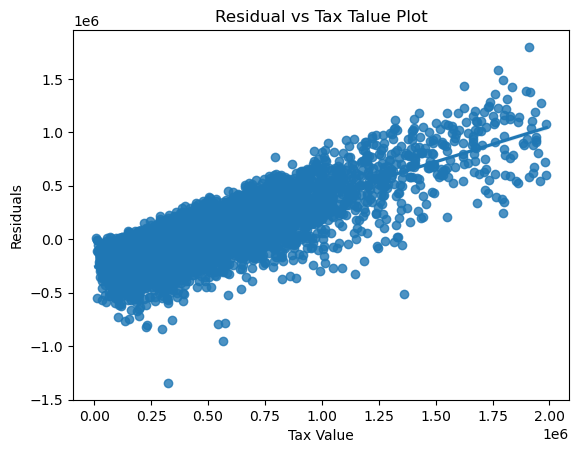

In [253]:
sns.regplot(data = train.sample(10000),x = 'tax_value',y ='residuals')

plt.xlabel('Tax Value')
plt.ylabel('Residuals')
plt.title('Residual vs Tax Talue Plot')
plt.show()


# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## MSE

In [259]:
mse = mean_squared_error(train.tax_value,train.yhat)
print(f'mse = {mse}')

mse = 64291873417.61123


## SSE

In [262]:
sse = mse * len(train)
print(f'sse = {sse}')

sse = 7.540922416898456e+16


## RMSE 

In [263]:
rmse = sqrt(mse)
print(f'rmse = {rmse}')

rmse = 253558.4220995454


## ESS

In [265]:
ess = ((train['yhat'] - train['tax_value'].mean())**2).sum()
print(f'ess = {ess}')

ess = 3.972616479338296e+16


## TSS

In [267]:
tss = ess + sse
print(f'tss = {tss}')

tss = 1.1513538896236752e+17


# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [268]:
train['baseline'] = train.tax_value.mean()

## mse baseline

In [270]:
mse_baseline = mean_squared_error(train.tax_value, train.baseline)
print(f'mse_baseline = {mse_baseline}')

mse_baseline = 98161331516.52928


## sse baseline

In [272]:
sse_baseline = mse_baseline * len(train)
print(f'sse_baseline = {sse_baseline}')

sse_baseline = 1.1513538896236752e+17


## rsme baseline

In [274]:
rsme_baseline = sqrt(mse_baseline)
print(f'rsme_baseline = {rsme_baseline}')

rsme_baseline = 313307.08820026607


# Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [277]:
if sse < sse_baseline:
    print('My model performs better than baseline')
else:
    print('My model performs worse than baseline')

My model performs better than baseline


# What is the amount of variance explained in your model?

In [282]:
r2 = ess/tss
print(f'r2 = {r2}')

r2 = 0.3450386987997897


# Is your model better than the baseline model?

In [285]:
df_eval = pd.DataFrame(np.array(['sse','mse','rmse']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['sse_baseline','mse_baseline','rmse_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([sse, mse, rmse])
df_baseline_eval['model_error'] = np.array([sse_baseline, mse_baseline, rmse_baseline])

print(df_eval)
print(df_baseline_eval)

  metric   model_error
0    sse  7.540922e+16
1    mse  6.429187e+10
2   rmse  2.535584e+05
          metric   model_error
0   sse_baseline  1.151354e+17
1   mse_baseline  9.816133e+10
2  rmse_baseline  5.029797e+05


In [294]:
eval = pd.DataFrame(np.array(['RSME']), columns=['metric'])
eval['model'] = pd.DataFrame(np.array([rmse]), columns=['yhat'])
eval['baseline'] = pd.DataFrame(np.array([rmse_baseline]), columns=['yhat'])


In [297]:
eval['difference'] = rmse_baseline - rmse
eval

,metric,model,baseline,difference
0,RSME,253558.4221,502979.698759,249421.27666


In [298]:
# Create a file named evaluate.py that contains the following functions.


In [301]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

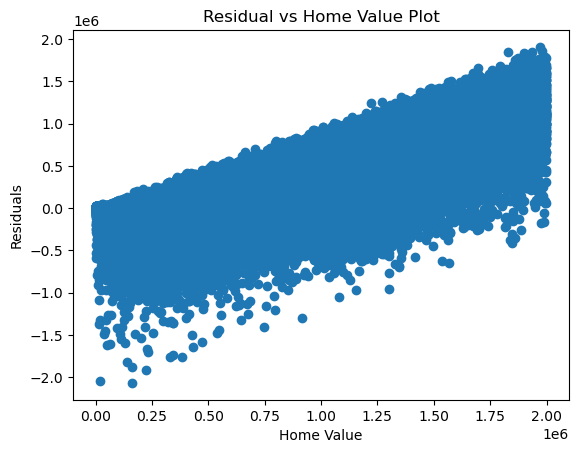

In [303]:
plot_residuals(train['tax_value'],train['yhat'])

In [311]:
def regression_errors(y, yhat):
    mse = mean_squared_error(y, yhat)
    sse=  mse * len(y)
    rmse = mse**.5
    
    ess = ((yhat - y.mean())**2).sum()
    tss = ess + sse
    
    return sse, ess, tss, mse, rmse

In [305]:
regression_errors(train.tax_value, train.yhat)

(7.540922416898456e+16,
 3.972616479338296e+16,
 1.1513538896236752e+17,
 64291873417.61123,
 253558.4220995454)

In [315]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    mse = mean_squared_error(y, baseline)
    sse = mse * len(y)
    rmse = mse **.5
    
    return sse, mse, rmse

In [316]:
baseline_mean_errors(train.tax_value)

(1.1513538896236752e+17, 98161331516.52928, 313307.08820026607)

In [317]:
def better_than_baseline(y, yhat):
    sse, ess, tss, mse, rmse = regression_errors(y, yhat)
    
    sse_baseline, mse_baseline, rmse_baseline = baseline_mean_errors(y)
    
    if sse < sse_baseline:
        print('My model performs better than baseline')
    else:
        print('My model performs worse than baseline. :( )')

In [318]:
better_than_baseline(train.tax_value, train.yhat)

My model performs better than baseline
